In [27]:
import argparse
import csv
from datetime import datetime

import numpy as np
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, TimeSeriesSplit
from sklearn.utils import compute_class_weight

import data_hh
import models
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [38]:
def visualize_cm(cm_path):
    cm_raw = np.load(cm_path)
    cm = cm_raw[:-1 , :]
    labels_idx = cm_raw[-1, :]
    model_name, dataset_name = cm_path.split('/')[-1].split('-')[:2]

    labels_keys = list(data_hh.cookActivities['hh102'].keys())
    labels = [labels_keys[idx] for idx in labels_idx]

    cm_df = pd.DataFrame(cm, index = labels, columns= labels)
    cm_df[labels] = cm_df[labels].apply(lambda x: x /np.sum(x) if np.sum(x) > 0 else x)

    
    plt.figure(figsize = (20,12))
    sn.heatmap(cm_df, annot=True)
    plt.title(f'Model: {model_name} Dataset: {dataset_name}', fontsize=20)
    plt.xticks(rotation=45)
    plt.xlabel('Actual Activity', fontsize=15)
    plt.ylabel('Predicted Activity', fontsize=15)

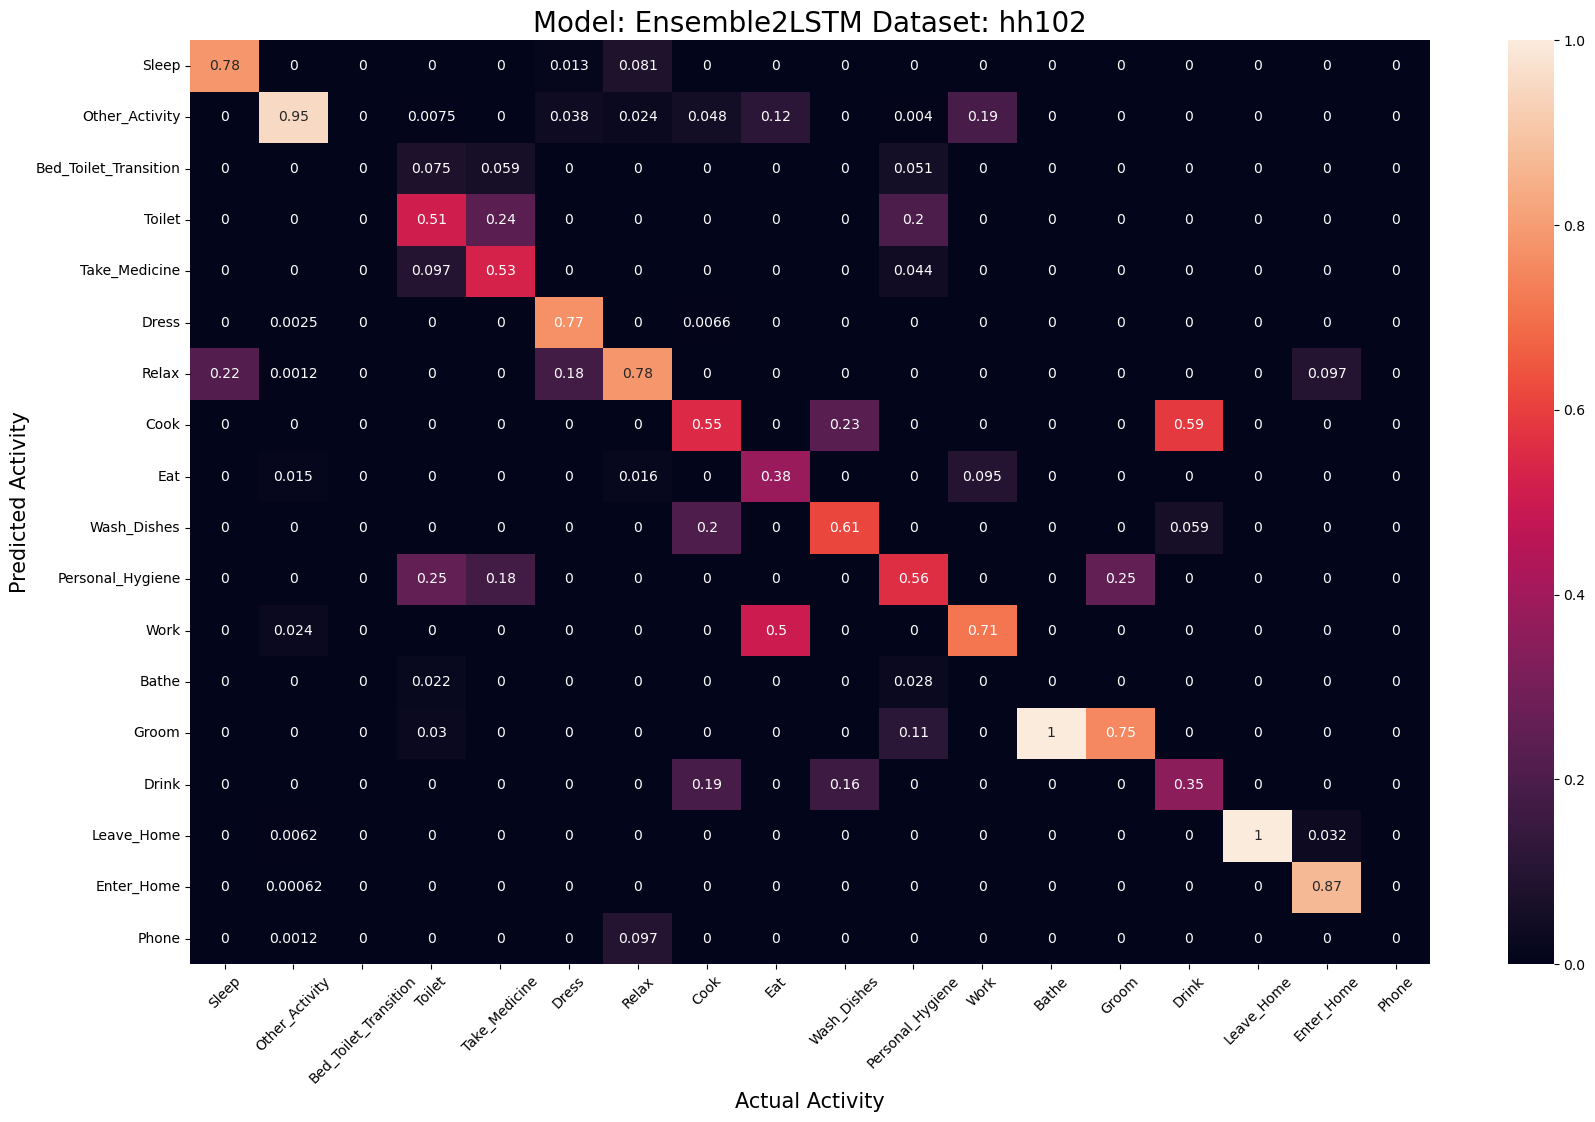

In [39]:
cm_raw = visualize_cm('./tmp/checkpoint/Ensemble2LSTM-20221027-192848/Ensemble2LSTM-hh102-fold-3-cm.npy')

In [17]:
cm_raw[-1, :]
labels_keys = list(data_hh.cookActivities['hh102'].keys())
for idx in cm_raw[-1, :]:
    print(labels_keys[idx])

Sleep
Other_Activity
Bed_Toilet_Transition
Toilet
Take_Medicine
Dress
Relax
Cook
Eat
Wash_Dishes
Personal_Hygiene
Work
Bathe
Groom
Drink
Leave_Home
Enter_Home
Phone


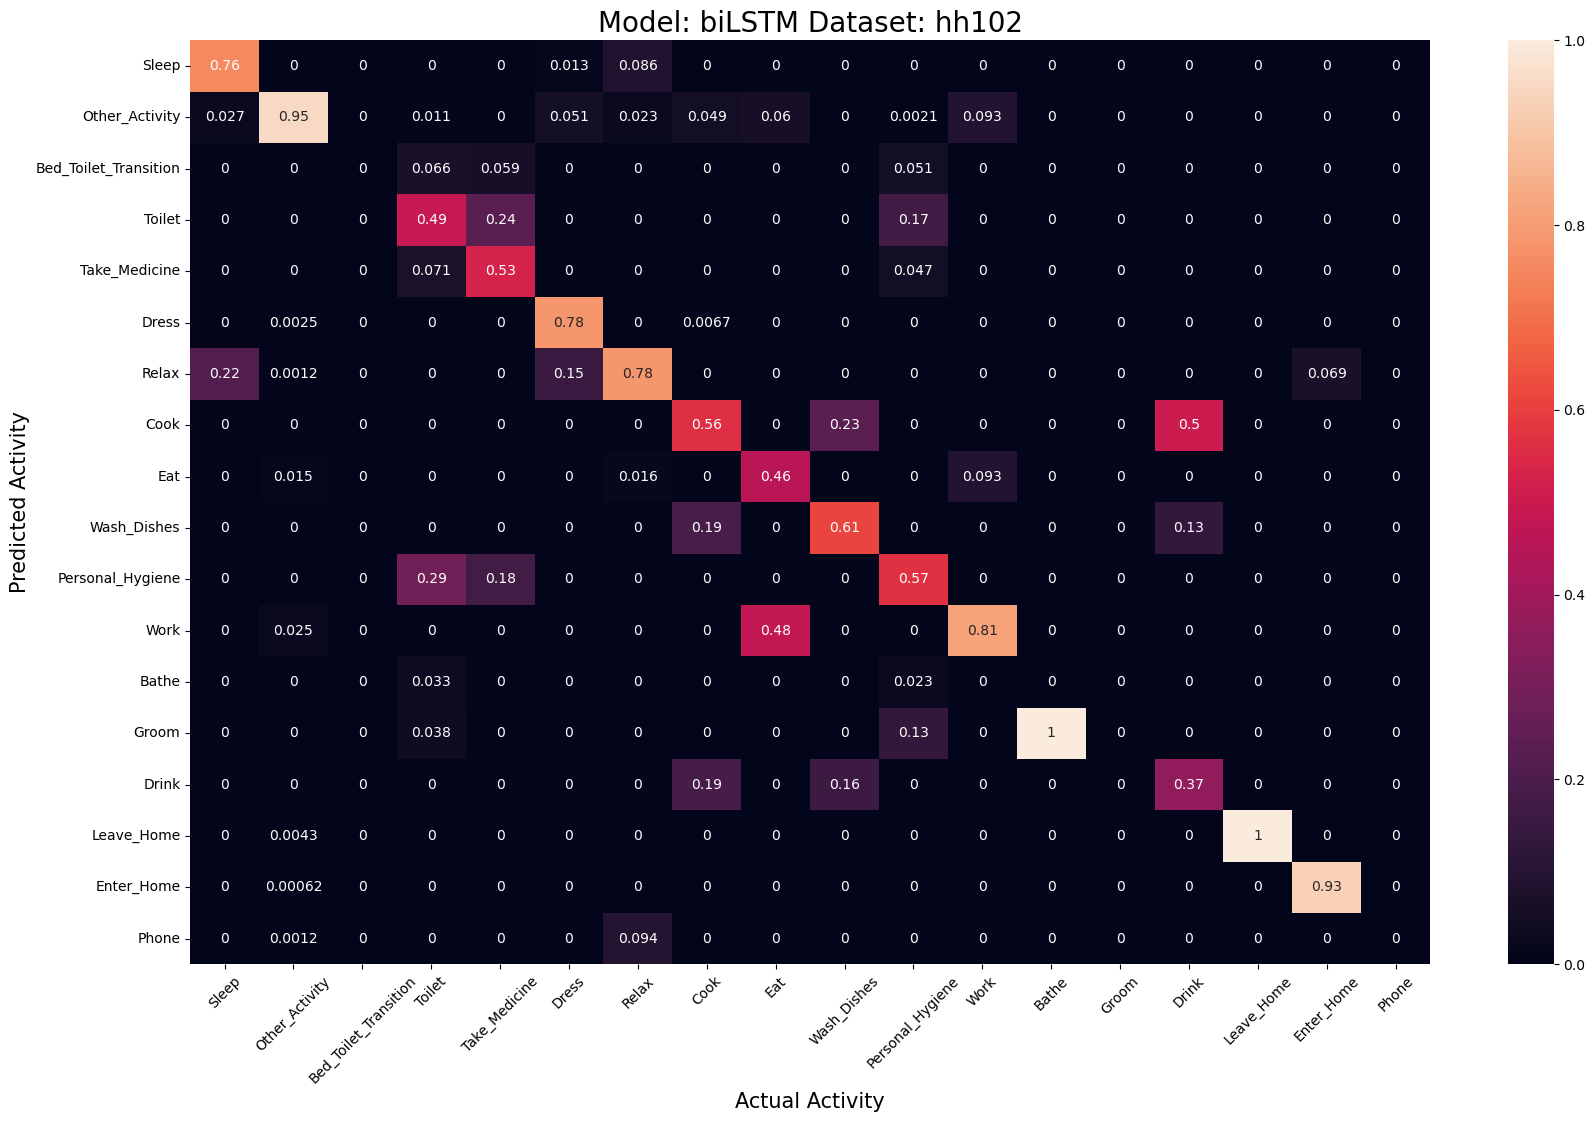

In [40]:
cm_raw = visualize_cm('./tmp/checkpoint/biLSTM-20221028-022952/biLSTM-hh102-fold-3-cm.npy')